ANÁLISE DA PROBABILIDADE DE UM ALUNO DE ENSINO BÁSICO TER FUMADO AO MENOS UMA VEZ EM RELAÇÃO A DADOS SOCIAIS APRESENTADOS

----------------------------------------------------------------

1.0 - TRATAMENTOS E PADRONIZAÇÃO DA BASE DE DADOS 

1.1 - Importação das bibliotecas

In [1]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import unidecode 
import unicodedata

1.2 - importação da base de dados principal

In [78]:
base = pd.read_csv('/content/PENSE2019_MICRODADOS.csv')
base.head(10)

,REGIAO,UF,MUNICIPIO_CAP,TIPO_MUNIC,SITUACAO,DEP_ADMIN,ESFERA,ESCOLA,TURMA,ALUNO,...,E01P65A,E01P66A,E01P26A,E01P27A,ESTRATO,IND_EXPANSAO,PESO_ALUNO_FREQ,PESO_INICIAL,POSEST,TOTAIS_POSEST
0,1,11,0,2.0,1.0,2.0,4.0,4,1,21,...,2.0,2.0,4.0,2.0,1101,1,4.361431,3.409091,1100000PRI1,1767
1,1,11,0,2.0,1.0,2.0,4.0,23,1,9,...,1.0,2.0,4.0,2.0,1101,1,3.838060,3.000000,1100000PRI1,1767
2,1,11,0,2.0,1.0,2.0,4.0,2,1,3,...,2.0,1.0,4.0,2.0,1101,1,2.934987,2.294118,1100000PRI1,1767
3,1,11,0,2.0,1.0,2.0,4.0,18,1,19,...,2.0,2.0,4.0,2.0,1101,1,4.786546,3.741379,1100000PRI1,1767
4,1,11,0,2.0,2.0,2.0,4.0,8,1,2,...,1.0,1.0,4.0,2.0,1101,1,4.535889,3.545455,1100000PRI1,1767
5,1,11,0,2.0,1.0,2.0,4.0,22,1,2,...,1.0,2.0,4.0,2.0,1101,1,2.771932,2.166667,1100000PRI1,1767
6,1,11,0,2.0,1.0,2.0,4.0,3,1,18,...,2.0,1.0,4.0,2.0,1101,1,7.164378,5.600000,1100000PRI1,1767
7,1,11,0,2.0,1.0,2.0,4.0,17,1,7,...,2.0,2.0,4.0,2.0,1101,1,2.771932,2.166667,1100000PRI1,1767
8,1,11,0,2.0,1.0,2.0,4.0,2,1,9,...,2.0,1.0,4.0,2.0,1101,1,2.934987,2.294118,1100000PRI1,1767
9,1,11,0,2.0,1.0,2.0,4.0,17,1,3,...,2.0,2.0,4.0,2.0,1101,1,2.771932,2.166667,1100000PRI1,1767


1.2.1 - Modificação dos nomes das colunas que são interessantes para o estudo

In [79]:
base.rename(columns={'DEP_ADMIN':'TIPO_ESCOLA','B01001A':'SEXO','B01003':'IDADE','B01002':'ETNIA','B01021A':'ANO_ESCOLAR'}, inplace = True)
base.rename(columns={'B01006':'MORA_MAE','B01007':'MORA_PAI','B04001':'JA_FUMOU','B04013':'JA_NARGUILE','B04014':'JA_CIGARRO_ELETRONICO'}, inplace = True)
base.rename(columns={'B04015':'JA_USOU_TABACO','B04006B':'RESPONSAVEL_FUMA','B04005A':'FUMA_PROXIMO_ALUNO','B04016':'AMIGO_FUMA'}, inplace = True)

1.2.2 - Filtros importantes para separação dos dados de região e municipio que serão analisados 

In [80]:
filtro_regiao = base['REGIAO'] == 3
filtro_municipio = base['MUNICIPIO_CAP'] != 0

In [81]:
base = base[filtro_regiao]
base = base[filtro_municipio]
base.head(10)

<ipython-input-81-3f67cfd35d57>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  base = base[filtro_municipio]


,REGIAO,UF,MUNICIPIO_CAP,TIPO_MUNIC,SITUACAO,TIPO_ESCOLA,ESFERA,ESCOLA,TURMA,ALUNO,...,E01P65A,E01P66A,E01P26A,E01P27A,ESTRATO,IND_EXPANSAO,PESO_ALUNO_FREQ,PESO_INICIAL,POSEST,TOTAIS_POSEST
99529,3,31,3106200,1.0,1.0,2.0,4.0,2,2,22,...,1.0,2.0,4.0,2.0,3110,1,14.871882,18.201201,3106200PRI1,14312
99530,3,31,3106200,1.0,1.0,2.0,4.0,3,1,13,...,2.0,4.0,4.0,1.0,3109,1,23.150669,28.333333,3106200PRI1,14312
99531,3,31,3106200,1.0,1.0,2.0,4.0,4,1,5,...,2.0,2.0,4.0,2.0,3110,1,14.480517,17.722222,3106200PRI1,14312
99532,3,31,3106200,1.0,1.0,2.0,4.0,3,1,3,...,2.0,4.0,4.0,1.0,3109,1,23.150669,28.333333,3106200PRI1,14312
99533,3,31,3106200,1.0,1.0,2.0,4.0,25,1,20,...,2.0,4.0,4.0,2.0,3108,1,16.422095,20.098456,3106200PRI1,14312
99534,3,31,3106200,1.0,1.0,2.0,4.0,4,1,15,...,2.0,2.0,4.0,2.0,3110,1,14.480517,17.722222,3106200PRI1,14312
99535,3,31,3106200,1.0,1.0,2.0,4.0,2,2,24,...,1.0,2.0,4.0,2.0,3110,1,14.871882,18.201201,3106200PRI1,14312
99536,3,31,3106200,1.0,1.0,2.0,4.0,3,1,28,...,2.0,1.0,4.0,2.0,3108,1,16.988374,20.791506,3106200PRI1,14312
99537,3,31,3106200,1.0,1.0,2.0,4.0,33,1,19,...,1.0,1.0,4.0,1.0,3108,1,15.855816,19.405405,3106200PRI1,14312
99538,3,31,3106200,1.0,1.0,2.0,4.0,26,1,3,...,1.0,1.0,4.0,2.0,3108,1,15.855816,19.405405,3106200PRI1,14312


1.2.3 - Retirada dos dados em que houve desistência ou não soube responder para o dado de já fumou

In [82]:
np.unique(base['JA_FUMOU'], return_counts=True)

(array([-2., -1.,  1.,  2.,  9.]), array([   6, 2395, 2771, 8831,   22]))

In [83]:
base.drop(base[base['JA_FUMOU'] == -2.0].index, axis=0, inplace=True)
base.drop(base[base['JA_FUMOU'] == -1.0].index, axis=0, inplace=True)
base.drop(base[base['JA_FUMOU'] == 9.0].index, axis=0, inplace=True)


In [84]:
np.unique(base['JA_FUMOU'], return_counts=True)

(array([1., 2.]), array([2771, 8831]))

1.2.4 - Retirada de todas as colunas que não representam importância para os dados que serão analisados

In [85]:
base=base[['MUNICIPIO_CAP','TIPO_ESCOLA','SEXO','IDADE','ETNIA','ANO_ESCOLAR','MORA_MAE','MORA_PAI','JA_FUMOU','JA_NARGUILE','JA_CIGARRO_ELETRONICO','JA_USOU_TABACO','RESPONSAVEL_FUMA','FUMA_PROXIMO_ALUNO','AMIGO_FUMA']]

In [86]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11602 entries, 99531 to 125065
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MUNICIPIO_CAP          11602 non-null  int64  
 1   TIPO_ESCOLA            11602 non-null  float64
 2   SEXO                   11602 non-null  float64
 3   IDADE                  11602 non-null  float64
 4   ETNIA                  11602 non-null  float64
 5   ANO_ESCOLAR            11602 non-null  float64
 6   MORA_MAE               11602 non-null  float64
 7   MORA_PAI               11602 non-null  float64
 8   JA_FUMOU               11602 non-null  float64
 9   JA_NARGUILE            11602 non-null  float64
 10  JA_CIGARRO_ELETRONICO  11602 non-null  float64
 11  JA_USOU_TABACO         11602 non-null  float64
 12  RESPONSAVEL_FUMA       11602 non-null  float64
 13  FUMA_PROXIMO_ALUNO     11602 non-null  float64
 14  AMIGO_FUMA             11602 non-null  float64
dt

1.2.5 - Transformando os dados numéricos em dados categoricos, de acordo com o dicionário de dados

In [87]:
def ajuste_municipio(valor):
  if valor == 3106200:
    return "BELO HORIZONTE"
  elif valor == 3205309:
    return "VITORIA"
  elif valor == 3304557:
    return "RIO DE JANEIRO"
  elif valor == 3550308:
    return "SAO PAULO"


In [88]:
def ajuste_escola(valor):
  if valor == 1:
    return "Publica"
  else:
    return "Privada"

In [89]:
def ajuste_sexo(valor):
  if valor == 1:
    return "Homem"
  elif valor == 2:
    return "Mulher"
  else:
    return "Sem Resposta"

In [90]:
def ajuste_idade(valor):
  if valor == 1:
    return "Menos de 13 anos"
  elif valor == 2:
    return "13 a 15 anos"
  elif valor == 3:
    return "16 a 17 anos"
  elif valor == 4:
    return "18 anos ou mais"
  else:
    return "Sem Resposta"

In [91]:
def ajuste_raca(valor):
  if valor == 1:
    return "Branca"
  elif valor == 2:
    return "Preta"
  elif valor == 3:
    return "Amarela"
  elif valor == 4:
    return "Parda"
  elif valor == 5:
    return "Indigena"
  else:
    return "Sem Resposta"

In [92]:
def ajuste_ensino_medio(valor):
  if valor == 1:
    return "6º ano"
  elif valor == 2:
    return "7º ano"
  elif valor == 3:
    return "8º ano"
  elif valor == 4:
    return "9º ano"
  elif valor == 5:
    return "1º ano ensino medio"
  elif valor == 6:
    return "2º ano ensino medio"
  elif valor == 7:
    return "3º ano ensino medio"
  else:
    return "Sem Resposta"

In [93]:
def ajuste_mora_mae(valor):
  if valor == 1:
    return "sim"
  else:
    return "não"

In [94]:
def ajuste_mora_pai(valor):
  if valor == 1:
    return "sim"
  else:
    return "não"

In [95]:
def ajuste_narguile(valor):
  if valor == 1:
    return "sim"
  elif valor == 2:
    return "não"
  else:
    return "Sem Resposta"

In [96]:
def ajuste_cigarro_eletronico(valor):
  if valor == 1:
    return "sim"
  elif valor == 2:
    return "não"
  else:
    return "Sem Resposta"

In [97]:
def ajuste_consumiu_tabaco(valor):
  if valor == 1:
    return "sim"
  elif valor == 2:
    return "não"
  else:
    return "Sem Resposta"

In [98]:
def ajuste_responsavel_fuma(valor):
  if valor == 1:
    return "Nenhum deles"
  elif valor == 2:
    return "Só meu pai ou responsável do sexo masculino"
  elif valor == 3:
    return "Só minha mãe ou responsável do sexo feminino"
  elif valor == 4:
    return "Os dois (ambos)"
  elif valor == 5:
    return "Não sei"
  else:
    return "Sem Resposta"

In [99]:
def ajuste_fumar_perto_7dias(valor):
  if valor == 1:
    return "Nenhum dia nos últimos 7 dias"
  elif valor == 2:
    return "1 ou 2 dias"
  elif valor == 3:
    return "3 ou 4 dias"
  elif valor == 4:
    return "5 ou 6 dias"
  elif valor == 5:
    return "Todos os dias"
  else:
    return "Sem Resposta"

In [100]:
def ajuste_amigo_fuma(valor):
  if valor == 1:
    return "sim"
  elif valor == 2:
    return "não"
  else:
    return "Sem Resposta"

In [101]:
base['MUNICIPIO_CAP'] = base['MUNICIPIO_CAP'].apply(lambda x : ajuste_municipio(x))
base['TIPO_ESCOLA'] = base['TIPO_ESCOLA'].apply(lambda x : ajuste_escola(x))
base['SEXO'] = base['SEXO'].apply(lambda x : ajuste_sexo(x))
base['IDADE'] = base['IDADE'].apply(lambda x : ajuste_idade(x))
base['ETNIA'] = base['ETNIA'].apply(lambda x : ajuste_raca(x))
base['ANO_ESCOLAR'] = base['ANO_ESCOLAR'].apply(lambda x : ajuste_ensino_medio(x))
base['MORA_MAE'] = base['MORA_MAE'].apply(lambda x : ajuste_mora_mae(x))
base['MORA_PAI'] = base['MORA_PAI'].apply(lambda x : ajuste_mora_pai(x))
base['JA_NARGUILE'] = base['JA_NARGUILE'].apply(lambda x : ajuste_narguile(x))
base['JA_CIGARRO_ELETRONICO'] = base['JA_CIGARRO_ELETRONICO'].apply(lambda x : ajuste_cigarro_eletronico(x))
base['RESPONSAVEL_FUMA'] = base['RESPONSAVEL_FUMA'].apply(lambda x : ajuste_responsavel_fuma(x))
base['FUMA_PROXIMO_ALUNO'] = base['FUMA_PROXIMO_ALUNO'].apply(lambda x : ajuste_fumar_perto_7dias(x))
base['JA_USOU_TABACO'] = base['JA_USOU_TABACO'].apply(lambda x : ajuste_consumiu_tabaco(x))
base['AMIGO_FUMA'] = base['AMIGO_FUMA'].apply(lambda x : ajuste_amigo_fuma(x))

In [102]:
base.head(10)

,MUNICIPIO_CAP,TIPO_ESCOLA,SEXO,IDADE,ETNIA,ANO_ESCOLAR,MORA_MAE,MORA_PAI,JA_FUMOU,JA_NARGUILE,JA_CIGARRO_ELETRONICO,JA_USOU_TABACO,RESPONSAVEL_FUMA,FUMA_PROXIMO_ALUNO,AMIGO_FUMA
99531,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Indigena,8º ano,sim,sim,1.0,sim,sim,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não
99533,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não
99534,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não
99539,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Preta,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim
99544,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não
99549,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não
99558,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não
99561,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,não,2.0,não,não,não,Nenhum deles,3 ou 4 dias,não
99562,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não
99566,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,7º ano,sim,sim,1.0,não,sim,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim


In [103]:
base.drop(base[base['SEXO'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['IDADE'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['ETNIA'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['ANO_ESCOLAR'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['JA_NARGUILE'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['JA_CIGARRO_ELETRONICO'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['JA_USOU_TABACO'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['RESPONSAVEL_FUMA'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['FUMA_PROXIMO_ALUNO'] == "Sem Resposta"].index, axis=0, inplace=True)
base.drop(base[base['AMIGO_FUMA'] == "Sem Resposta"].index, axis=0, inplace=True)

1.3 - Tratamento da base de dados de IDH dos municípios brasileiros

1.3.1 - importação da base de dados de IDH

In [104]:
base_IDH = pd.read_csv('/content/base_IDH_2010.csv')


1.3.2 - Tratativas dos nomes de municípios, retirando acentos e tranformando as letras em uppercase. 

In [105]:
def padronizacao_acentuacao(valor):
    return unidecode.unidecode(valor)

In [106]:
base_IDH['Município'] = base_IDH['Município'].apply(lambda x : padronizacao_acentuacao(x))
base_IDH['Município']= base_IDH['Município'].str.upper()
base_IDH.head(10)

,Ranking IDHM 2010,Município,IDHM 2010,IDHM\nRenda\n2010,IDHM Longevidade 2010,IDHM Educação 2010
0,1 º,SAO CAETANO DO SUL (SP),"0,862","0,891","0,887","0,811"
1,2 º,AGUAS DE SAO PEDRO (SP),"0,854","0,849","0,89","0,825"
2,3 º,FLORIANOPOLIS (SC),"0,847","0,87","0,873","0,8"
3,4 º,BALNEARIO CAMBORIU (SC),"0,845","0,854","0,894","0,789"
4,4 º,VITORIA (ES),"0,845","0,876","0,855","0,805"
5,6 º,SANTOS (SP),"0,84","0,861","0,852","0,807"
6,7 º,NITEROI (RJ),"0,837","0,887","0,854","0,773"
7,8 º,JOACABA (SC),"0,827","0,823","0,891","0,771"
8,9 º,BRASILIA (DF),"0,824","0,863","0,873","0,742"
9,10 º,CURITIBA (PR),"0,823","0,85","0,855","0,768"


1.3.3 - Separação do nome da cidade da sigla do estado

In [107]:
base_IDH[['CIDADE', 'ESTADO']] = base_IDH['Município'].str.split('(', expand=True, n=1)
base_IDH.head(10)

,Ranking IDHM 2010,Município,IDHM 2010,IDHM\nRenda\n2010,IDHM Longevidade 2010,IDHM Educação 2010,CIDADE,ESTADO
0,1 º,SAO CAETANO DO SUL (SP),"0,862","0,891","0,887","0,811",SAO CAETANO DO SUL,SP)
1,2 º,AGUAS DE SAO PEDRO (SP),"0,854","0,849","0,89","0,825",AGUAS DE SAO PEDRO,SP)
2,3 º,FLORIANOPOLIS (SC),"0,847","0,87","0,873","0,8",FLORIANOPOLIS,SC)
3,4 º,BALNEARIO CAMBORIU (SC),"0,845","0,854","0,894","0,789",BALNEARIO CAMBORIU,SC)
4,4 º,VITORIA (ES),"0,845","0,876","0,855","0,805",VITORIA,ES)
5,6 º,SANTOS (SP),"0,84","0,861","0,852","0,807",SANTOS,SP)
6,7 º,NITEROI (RJ),"0,837","0,887","0,854","0,773",NITEROI,RJ)
7,8 º,JOACABA (SC),"0,827","0,823","0,891","0,771",JOACABA,SC)
8,9 º,BRASILIA (DF),"0,824","0,863","0,873","0,742",BRASILIA,DF)
9,10 º,CURITIBA (PR),"0,823","0,85","0,855","0,768",CURITIBA,PR)


1.3.4 - Retirada das colunas que não represnetam grande significado para o enriquecimento

In [108]:
base_IDH = base_IDH.drop(columns=['Ranking IDHM 2010','Município','IDHM 2010','IDHM\nRenda\n2010','IDHM Longevidade 2010','ESTADO'])

In [109]:
base_IDH.head(10)

,IDHM Educação 2010,CIDADE
0,"0,811",SAO CAETANO DO SUL
1,"0,825",AGUAS DE SAO PEDRO
2,"0,8",FLORIANOPOLIS
3,"0,789",BALNEARIO CAMBORIU
4,"0,805",VITORIA
5,"0,807",SANTOS
6,"0,773",NITEROI
7,"0,771",JOACABA
8,"0,742",BRASILIA
9,"0,768",CURITIBA


1.4 - Enriquecendo com dados de IDH o dataset principal, utilizando a cidade como ponto de comparação 

In [110]:
def enriquecimento_IDH(valor):
  a = str(valor).strip()
  for i in base_IDH.index:
    b = str(base_IDH['CIDADE'][i]).strip()
    if a == b:
      return base_IDH['IDHM Educação 2010'][i]

In [111]:
base['IDH_EDUCACAO'] = base['MUNICIPIO_CAP'].apply(lambda x : enriquecimento_IDH(x))
base.head(10)

,MUNICIPIO_CAP,TIPO_ESCOLA,SEXO,IDADE,ETNIA,ANO_ESCOLAR,MORA_MAE,MORA_PAI,JA_FUMOU,JA_NARGUILE,JA_CIGARRO_ELETRONICO,JA_USOU_TABACO,RESPONSAVEL_FUMA,FUMA_PROXIMO_ALUNO,AMIGO_FUMA,IDH_EDUCACAO
99531,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Indigena,8º ano,sim,sim,1.0,sim,sim,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não,"0,737"
99533,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,"0,737"
99534,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não,"0,737"
99539,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Preta,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim,"0,737"
99544,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não,"0,737"
99549,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não,"0,737"
99558,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,"0,737"
99561,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,não,2.0,não,não,não,Nenhum deles,3 ou 4 dias,não,"0,737"
99562,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,"0,737"
99566,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,7º ano,sim,sim,1.0,não,sim,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim,"0,737"


In [112]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 99531 to 125065
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MUNICIPIO_CAP          11390 non-null  object 
 1   TIPO_ESCOLA            11390 non-null  object 
 2   SEXO                   11390 non-null  object 
 3   IDADE                  11390 non-null  object 
 4   ETNIA                  11390 non-null  object 
 5   ANO_ESCOLAR            11390 non-null  object 
 6   MORA_MAE               11390 non-null  object 
 7   MORA_PAI               11390 non-null  object 
 8   JA_FUMOU               11390 non-null  float64
 9   JA_NARGUILE            11390 non-null  object 
 10  JA_CIGARRO_ELETRONICO  11390 non-null  object 
 11  JA_USOU_TABACO         11390 non-null  object 
 12  RESPONSAVEL_FUMA       11390 non-null  object 
 13  FUMA_PROXIMO_ALUNO     11390 non-null  object 
 14  AMIGO_FUMA             11390 non-null  object 
 1

1.5 Trasformando coluna IDH em campo numérico 

In [113]:
base['IDH_EDUCACAO'] = base['IDH_EDUCACAO'].str.replace(',','.').astype(float)

In [114]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11390 entries, 99531 to 125065
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MUNICIPIO_CAP          11390 non-null  object 
 1   TIPO_ESCOLA            11390 non-null  object 
 2   SEXO                   11390 non-null  object 
 3   IDADE                  11390 non-null  object 
 4   ETNIA                  11390 non-null  object 
 5   ANO_ESCOLAR            11390 non-null  object 
 6   MORA_MAE               11390 non-null  object 
 7   MORA_PAI               11390 non-null  object 
 8   JA_FUMOU               11390 non-null  float64
 9   JA_NARGUILE            11390 non-null  object 
 10  JA_CIGARRO_ELETRONICO  11390 non-null  object 
 11  JA_USOU_TABACO         11390 non-null  object 
 12  RESPONSAVEL_FUMA       11390 non-null  object 
 13  FUMA_PROXIMO_ALUNO     11390 non-null  object 
 14  AMIGO_FUMA             11390 non-null  object 
 1

1.6 - Salvando a base de dados que será utilizada no estudo

In [115]:
base.to_csv("/content/base_tabagismo_IDH.csv", index=False)

-----------------------------------------------------------

2.0 - EXPLORAÇÃO DOS DADOS E REPRESENTAÇÕES GRÁFICAS

- Identificação de outliers
- Qual a predominância dos dados entre estudantes que participaram da pesquisa;



2.1 - Importando a base de dados

In [116]:
df = pd.read_csv('/content/base_tabagismo_IDH.csv')
df.head(10)

,MUNICIPIO_CAP,TIPO_ESCOLA,SEXO,IDADE,ETNIA,ANO_ESCOLAR,MORA_MAE,MORA_PAI,JA_FUMOU,JA_NARGUILE,JA_CIGARRO_ELETRONICO,JA_USOU_TABACO,RESPONSAVEL_FUMA,FUMA_PROXIMO_ALUNO,AMIGO_FUMA,IDH_EDUCACAO
0,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Indigena,8º ano,sim,sim,1.0,sim,sim,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não,0.737
1,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,0.737
2,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não,0.737
3,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Preta,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim,0.737
4,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,1 ou 2 dias,não,0.737
5,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Só meu pai ou responsável do sexo masculino,Todos os dias,não,0.737
6,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Parda,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,0.737
7,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,8º ano,sim,não,2.0,não,não,não,Nenhum deles,3 ou 4 dias,não,0.737
8,BELO HORIZONTE,Privada,Homem,13 a 15 anos,Branca,8º ano,sim,sim,2.0,não,não,não,Nenhum deles,Nenhum dia nos últimos 7 dias,não,0.737
9,BELO HORIZONTE,Privada,Mulher,13 a 15 anos,Branca,7º ano,sim,sim,1.0,não,sim,não,Nenhum deles,Nenhum dia nos últimos 7 dias,sim,0.737


2.2 - Tratamento da coluna alvo (Ja_fumou)

Como a Representação dos dados de se o Aluno já fumou ou não alguma vez na vida, continua como base numérica, para a representação gráfica, o dados de 1 e 2 , representando sim ou não, respectivamente, serão transformados em campo de texto. 

In [117]:
def ajuste_ja_fumou(valor):
  if valor == 1:
    return "sim"
  else:
    return "não"

In [118]:
df['JA_FUMOU'] = df['JA_FUMOU'].apply(lambda x : ajuste_ja_fumou(x))

2.3 - verificando se a base não possui valores vazios

In [119]:
df.isna().sum()

MUNICIPIO_CAP            0
TIPO_ESCOLA              0
SEXO                     0
IDADE                    0
ETNIA                    0
ANO_ESCOLAR              0
MORA_MAE                 0
MORA_PAI                 0
JA_FUMOU                 0
JA_NARGUILE              0
JA_CIGARRO_ELETRONICO    0
JA_USOU_TABACO           0
RESPONSAVEL_FUMA         0
FUMA_PROXIMO_ALUNO       0
AMIGO_FUMA               0
IDH_EDUCACAO             0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11390 entries, 0 to 11389
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MUNICIPIO_CAP          11390 non-null  object 
 1   TIPO_ESCOLA            11390 non-null  object 
 2   SEXO                   11390 non-null  object 
 3   IDADE                  11390 non-null  object 
 4   ETNIA                  11390 non-null  object 
 5   ANO_ESCOLAR            11390 non-null  object 
 6   MORA_MAE               11390 non-null  object 
 7   MORA_PAI               11390 non-null  object 
 8   JA_FUMOU               11390 non-null  object 
 9   JA_NARGUILE            11390 non-null  object 
 10  JA_CIGARRO_ELETRONICO  11390 non-null  object 
 11  JA_USOU_TABACO         11390 non-null  object 
 12  RESPONSAVEL_FUMA       11390 non-null  object 
 13  FUMA_PROXIMO_ALUNO     11390 non-null  object 
 14  AMIGO_FUMA             11390 non-null  object 
 15  ID

2.4 - Identificação de outliers para os campos numéricos da base de dados: 

2.4.1 - IDH da cidade de estudo 

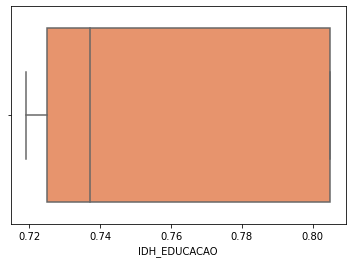

In [121]:
sns.boxplot(x=df['IDH_EDUCACAO'], palette="OrRd");

2.5 - Visualização dos dados nominais para identificação de outliers

Função para padronização dos gráficos de coluna

In [122]:
def countplot_format(classe, eixox, eixoy, titulo):
  grafico = plt.subplots(figsize=(15, 13))
  grafico = sns.countplot(x=df[classe],palette = 'OrRd_r')
  grafico.set_title(f'{titulo}\n', fontsize=30); 
  grafico.set_xlabel(eixox, fontsize=10); 
  grafico.set_ylabel(eixoy, fontsize=10);
  return grafico

2.5.1 - Quantidade de Alunos que já experimentaram cigarro ao menos uma vez 

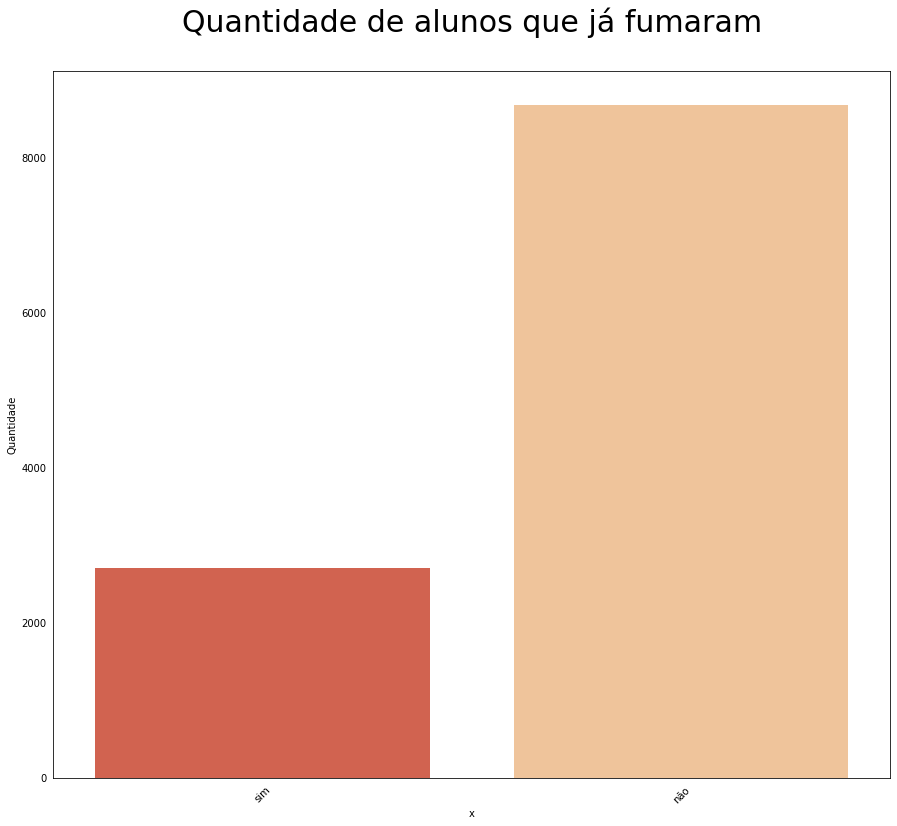

In [123]:
situacao_ja_fumou = countplot_format('JA_FUMOU', 'x', 'Quantidade', 'Quantidade de alunos que já fumaram')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

In [124]:
df['JA_FUMOU'].describe()

count     11390
unique        2
top         não
freq       8684
Name: JA_FUMOU, dtype: object

2.5.2 - Idade predominante dos alunos que participaram da pesquisa 

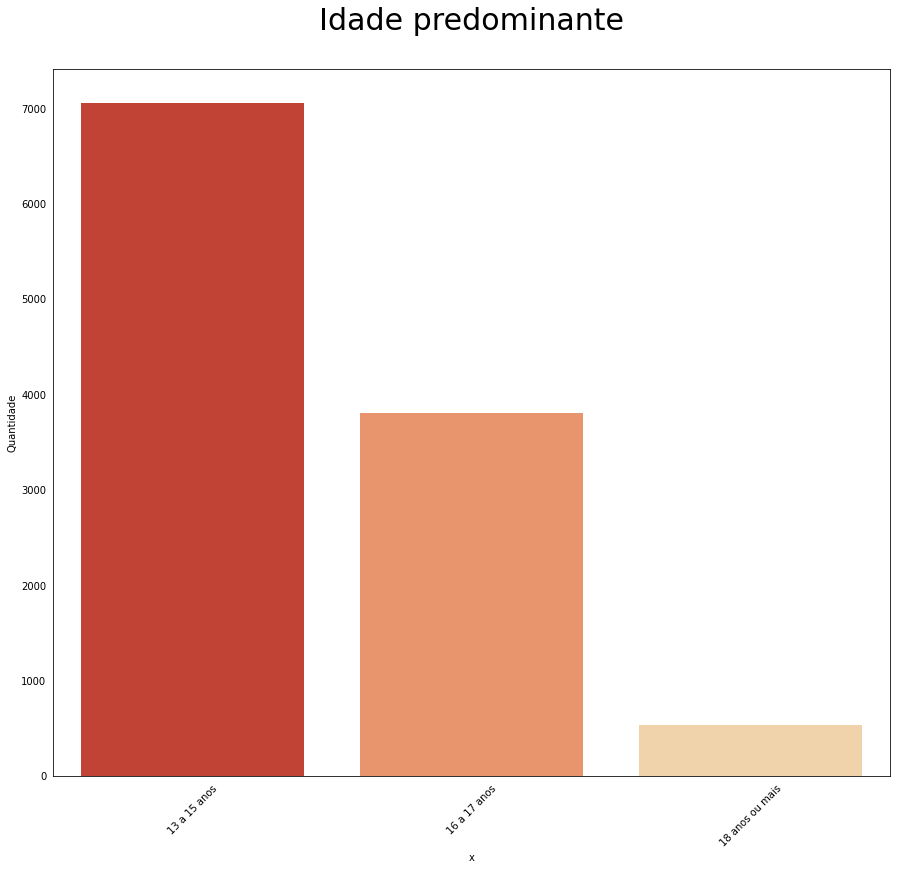

In [125]:
idade = countplot_format('IDADE', 'x', 'Quantidade', 'Idade predominante')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

2.5.3 - Sexo predominante dos alunos que participaram da pesquisa 


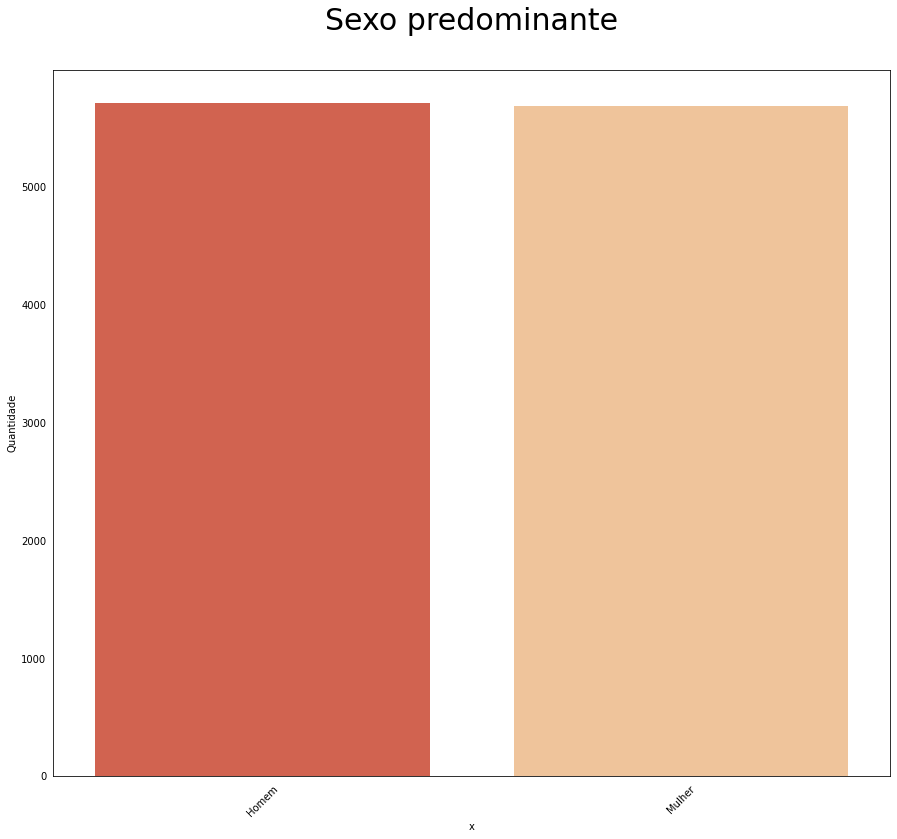

In [126]:
sexo = countplot_format('SEXO', 'x', 'Quantidade', 'Sexo predominante')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

2.5.4 - Etinia predominante dos alunos que participaram da pesquisa 

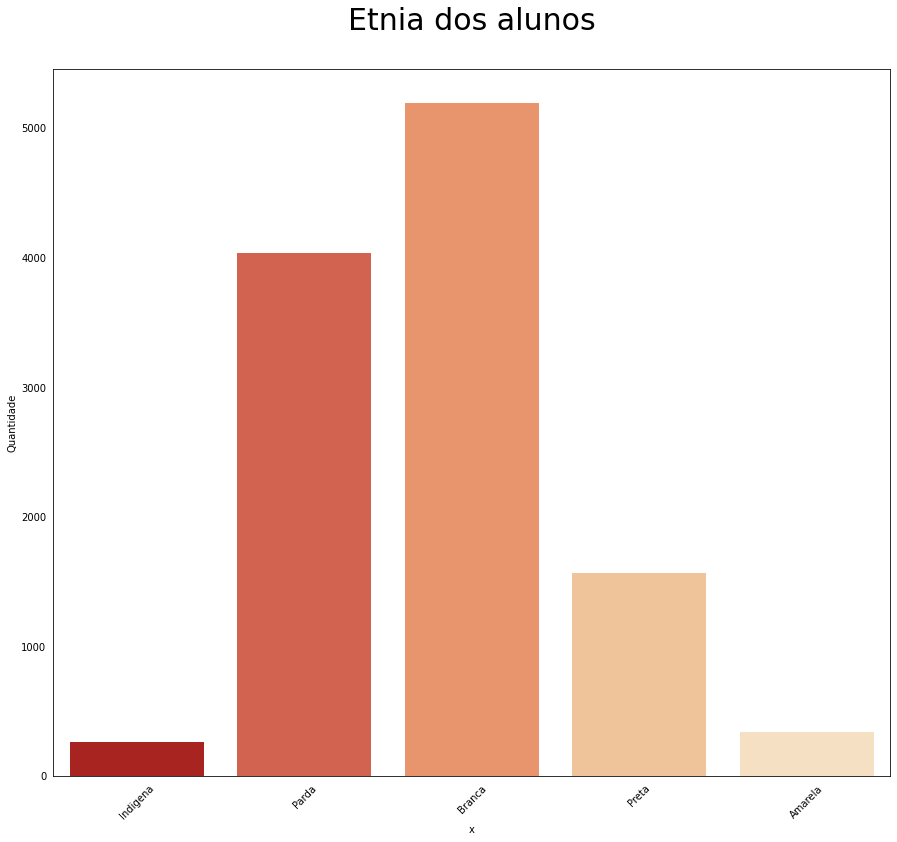

In [127]:
etnia = countplot_format('ETNIA', 'x', 'Quantidade', 'Etnia dos alunos')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

2.5.5 - Ano escolar predominante dos alunos que participaram da pesquisa 

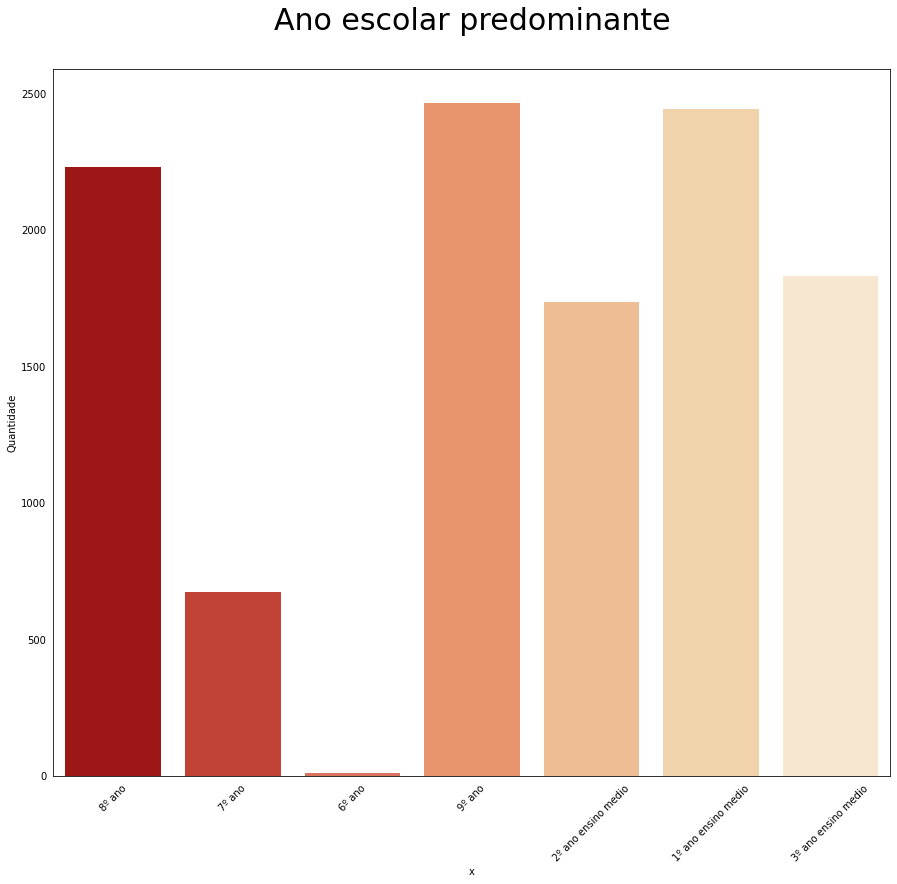

In [128]:
anoEscolar = countplot_format('ANO_ESCOLAR', 'x', 'Quantidade', 'Ano escolar predominante')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

2.5.6 - Incidencia de pais, ou responsáveis, fumantes para alunos que participaram da pesquisa 

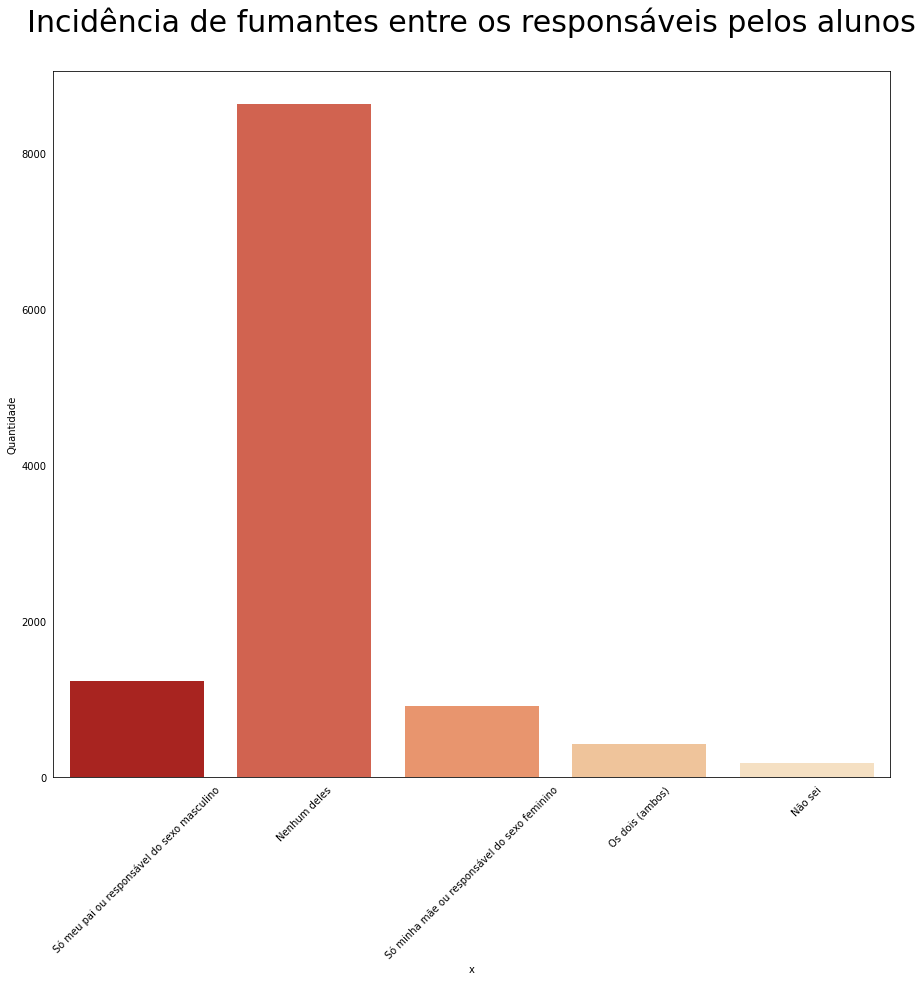

In [129]:
respFumante = countplot_format('RESPONSAVEL_FUMA', 'x', 'Quantidade', 'Incidência de fumantes entre os responsáveis pelos alunos')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

2.5.7 - Dados de amigo fumante predominante dos alunos que participaram da pesquisa 

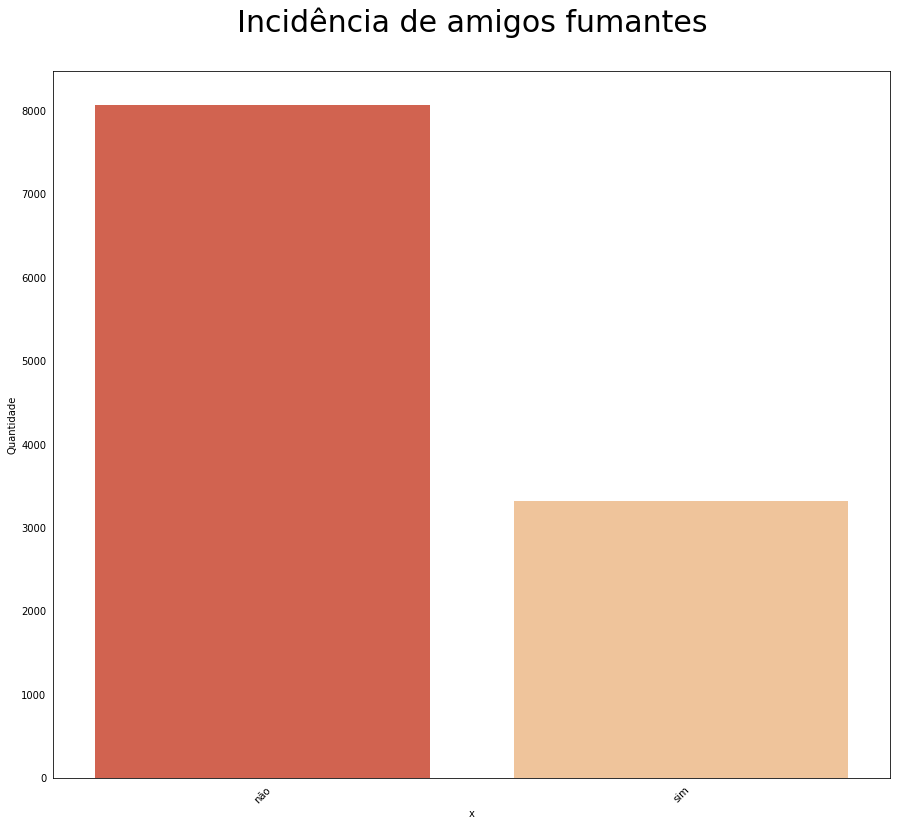

In [130]:
amigo = countplot_format('AMIGO_FUMA', 'x', 'Quantidade', 'Incidência de amigos fumantes')
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
plt.xticks(rotation=45)
plt.show()

-------------------------------------------------------------

3.0 - EXPLORAÇÃO DOS DADOS CONJUNTOS

- Qual a influência de cada dado para a criação do hábito de fumar, entre os adolescentes;
- Qual a influência do IDH para o nível de tabagismo entre os jovens;
- Escolas públicas ou privadas são de relevância para o desenvolvimento do hábito?

Função de padronização dos mapas de calor

In [131]:
def mapaDeCalor(principal, comparativo, eixoX, eixoY, titulo):
  bd = df.loc[~df[principal].isin(['NAO SE APLICA', 'NS/NR']),[principal, comparativo]]# "~" para negar
  info_adequacao = pd.pivot_table(bd, index=principal, columns=comparativo, aggfunc=len, fill_value=0)
  grafico = sns.heatmap(info_adequacao, cmap="OrRd", annot=True, fmt ='d', linewidths=.3, xticklabels=True, yticklabels=True)
  grafico.set_xlabel(eixoX, fontsize=20)
  grafico.set_ylabel(eixoY, fontsize=20)
  grafico.set_title(f'{titulo}\n', fontsize=20)

  plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = True, bottom = False)
  plt.xticks(rotation=45)
  plt.gcf().set_size_inches(15, 10)
  return grafico

3.1 - Município x Já fumou

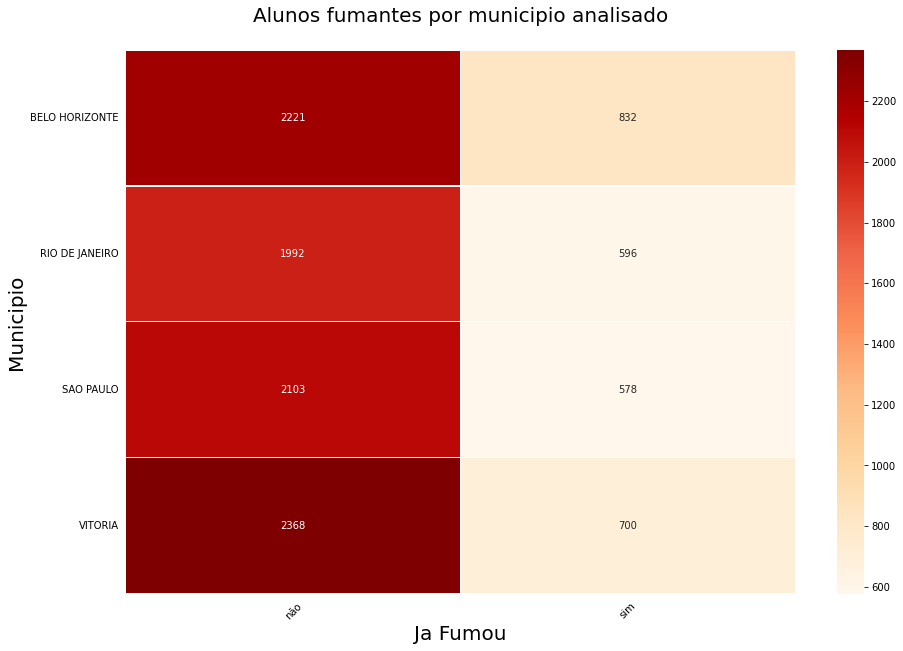

In [132]:
jaFumou_Municipio = mapaDeCalor('MUNICIPIO_CAP','JA_FUMOU', 'Ja Fumou', 'Municipio', "Alunos fumantes por municipio analisado")
plt.show()

3.2 - Tipo de escola x Já fumou

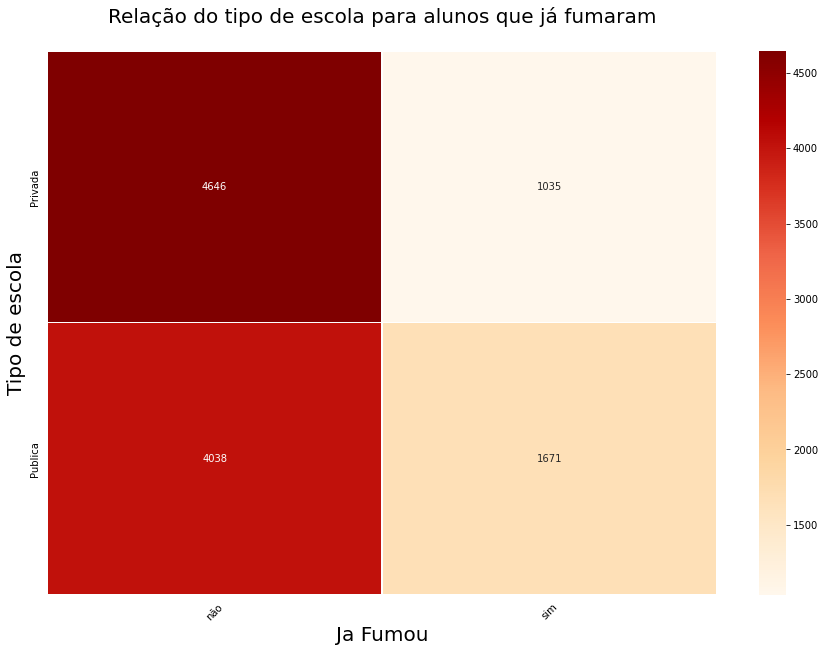

In [133]:
jaFumou_escola = mapaDeCalor('TIPO_ESCOLA', 'JA_FUMOU', 'Ja Fumou', 'Tipo de escola', "Relação do tipo de escola para alunos que já fumaram")
plt.show()

3.3 - Sexo x Já fumou 

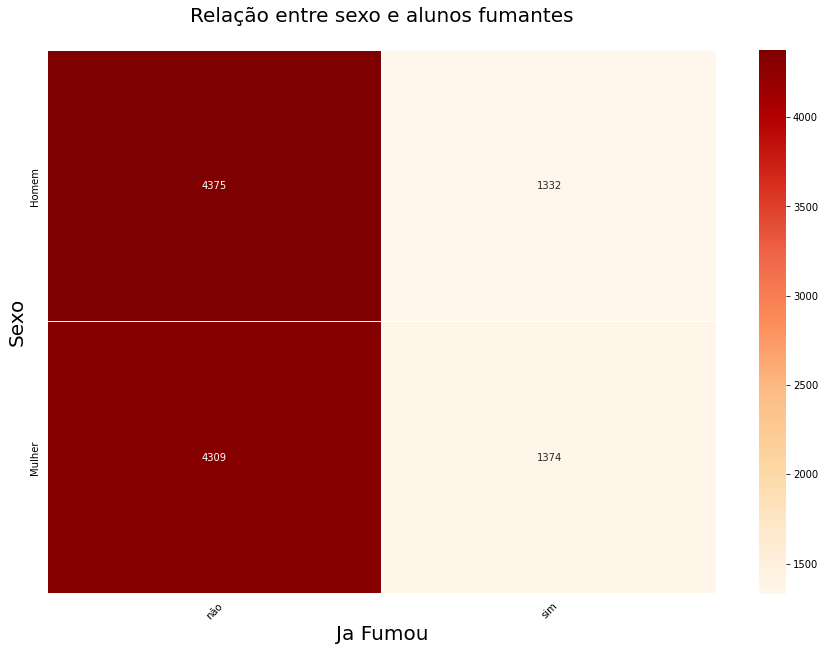

In [134]:
jaFumou_sexo = mapaDeCalor('SEXO', 'JA_FUMOU', 'Ja Fumou', 'Sexo', "Relação entre sexo e alunos fumantes")
plt.show()

3.4 - Etnia x Já fumou


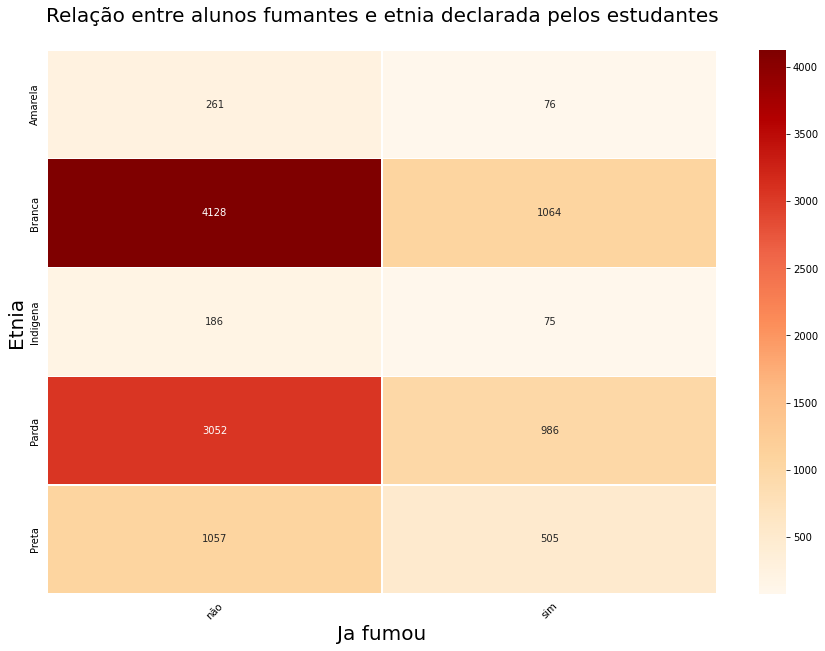

In [135]:
jaFumou_cor = mapaDeCalor('ETNIA', 'JA_FUMOU', 'Ja fumou', 'Etnia', "Relação entre alunos fumantes e etnia declarada pelos estudantes")
plt.show()

3.5 - Ano Escolar x Já fumou

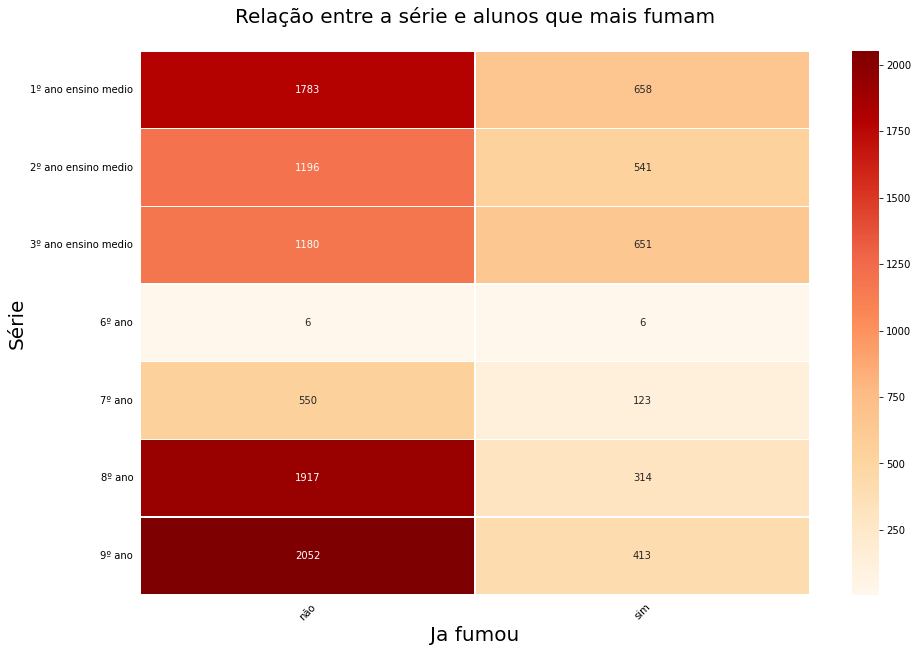

In [136]:
anoEscolar_jaFumou = mapaDeCalor('ANO_ESCOLAR', 'JA_FUMOU', 'Ja fumou', 'Série', "Relação entre a série e alunos que mais fumam")
plt.show()

3.6 - Narguile x Já fumou 

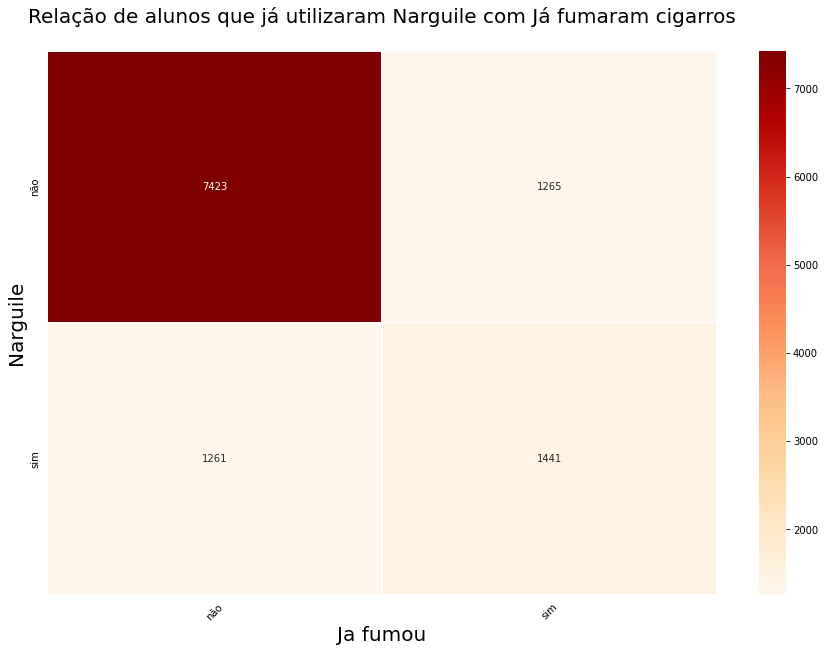

In [137]:
narguile = mapaDeCalor('JA_NARGUILE', 'JA_FUMOU', 'Ja fumou', 'Narguile', "Relação de alunos que já utilizaram Narguile com Já fumaram cigarros")
plt.show()

3.7 - Cigarro eletrônico x Já Fumou

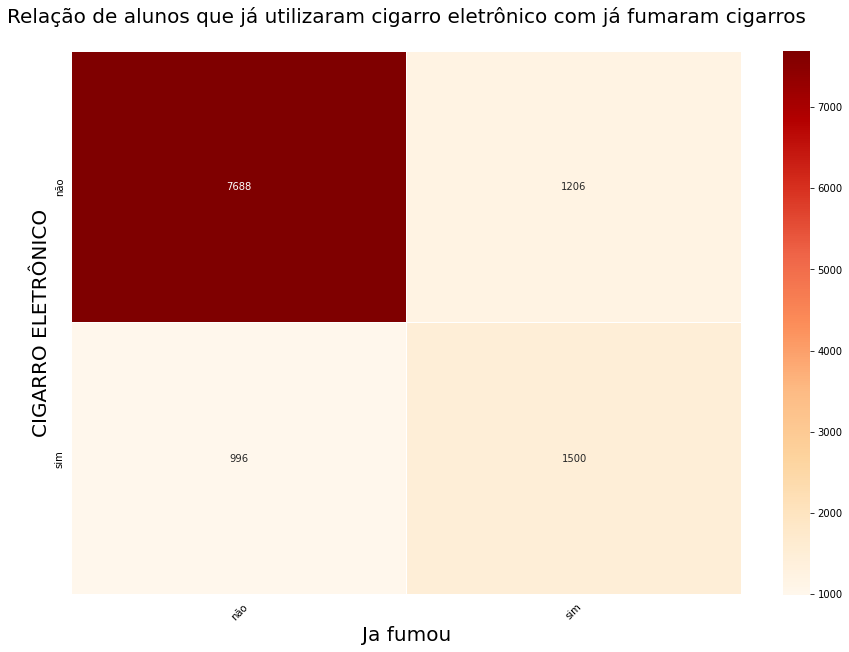

In [138]:
cEletr = mapaDeCalor('JA_CIGARRO_ELETRONICO', 'JA_FUMOU', 'Ja fumou', 'CIGARRO ELETRÔNICO', "Relação de alunos que já utilizaram cigarro eletrônico com já fumaram cigarros")
plt.show()

3.8 - Responsável Fuma x aluno já Fumou

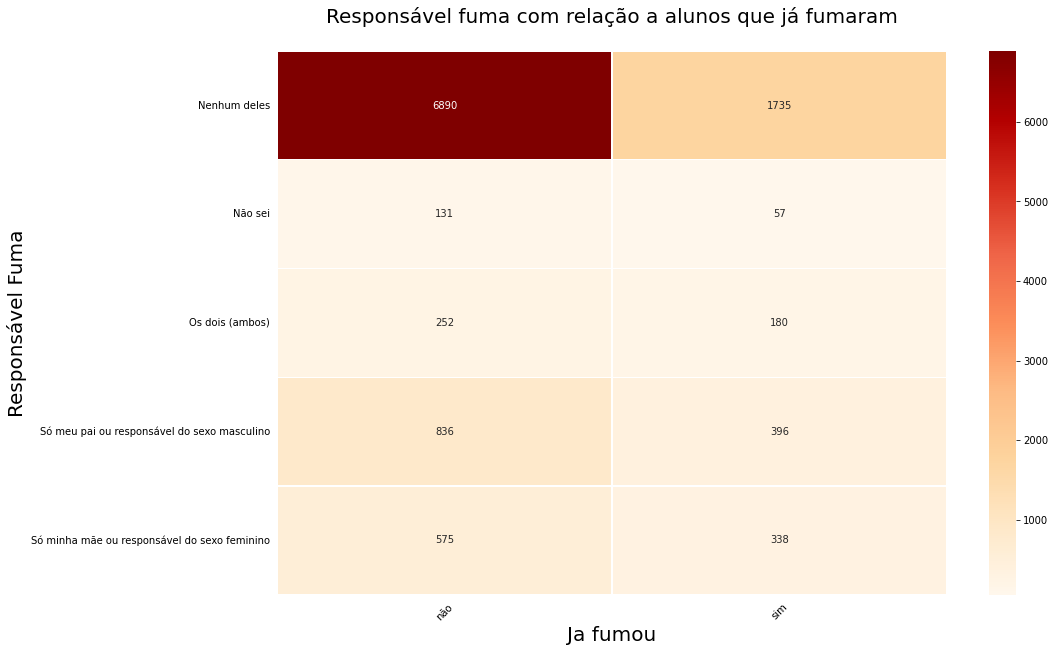

In [139]:
ResponsavelFuma = mapaDeCalor('RESPONSAVEL_FUMA', 'JA_FUMOU', 'Ja fumou', 'Responsável Fuma', "Responsável fuma com relação a alunos que já fumaram")
plt.show()

3.9 - Amigo Fuma x aluno já fumou

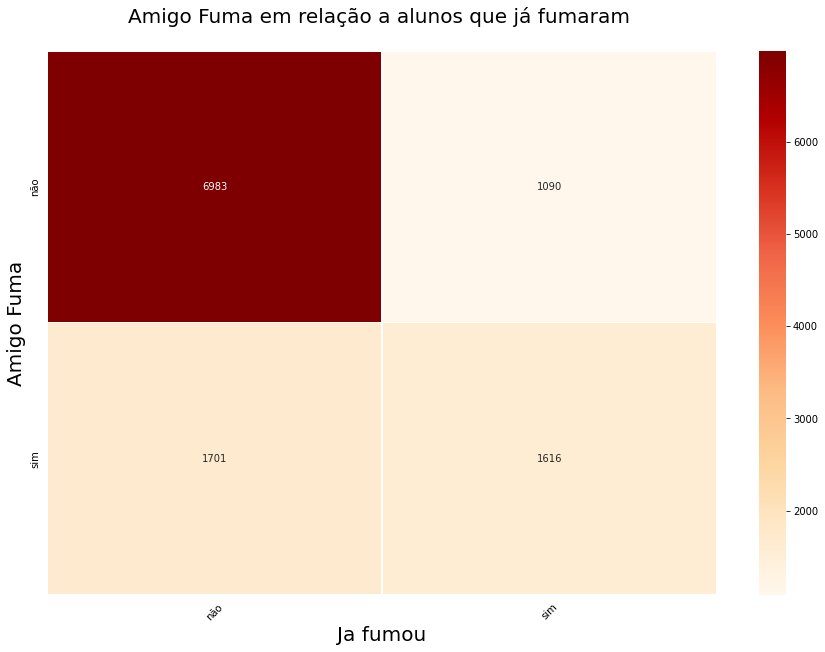

In [140]:
amigo = mapaDeCalor('AMIGO_FUMA', 'JA_FUMOU', 'Ja fumou', 'Amigo Fuma', "Amigo Fuma em relação a alunos que já fumaram ")
plt.show()

3.10 - IDH x alunos que já fumaram

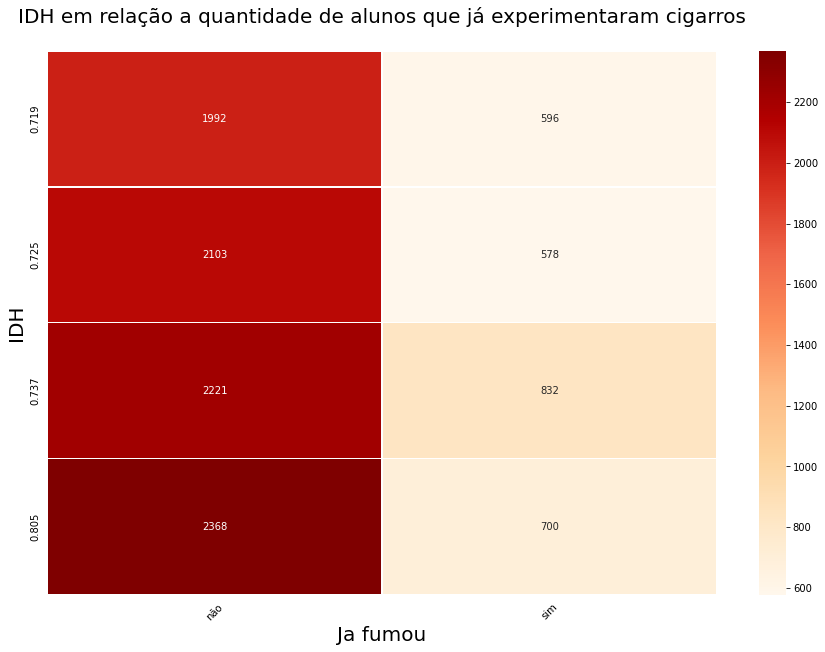

In [141]:
idh = mapaDeCalor('IDH_EDUCACAO', 'JA_FUMOU', 'Ja fumou', 'IDH', "IDH em relação a quantidade de alunos que já experimentaram cigarros")
plt.show()

-------------------------------------------------------------


4.0 - PRÉ PROCESSAMENTO DOS DADOS PARA ML

4.1 - Importando as bibliotecas

In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

4.2 - Importação da base de dados utilizada na análise 

In [143]:
base_ML = pd.read_csv('/content/base_tabagismo_IDH.csv')

4.3 - Trasformação dos dados da base em dados numericos 

In [144]:
base_ML = base_ML.drop(columns=['MUNICIPIO_CAP'])

In [145]:
base_ML = pd.get_dummies(base_ML)
base_ML.head(10)

,JA_FUMOU,IDH_EDUCACAO,TIPO_ESCOLA_Privada,TIPO_ESCOLA_Publica,SEXO_Homem,SEXO_Mulher,IDADE_13 a 15 anos,IDADE_16 a 17 anos,IDADE_18 anos ou mais,ETNIA_Amarela,...,RESPONSAVEL_FUMA_Os dois (ambos),RESPONSAVEL_FUMA_Só meu pai ou responsável do sexo masculino,RESPONSAVEL_FUMA_Só minha mãe ou responsável do sexo feminino,FUMA_PROXIMO_ALUNO_1 ou 2 dias,FUMA_PROXIMO_ALUNO_3 ou 4 dias,FUMA_PROXIMO_ALUNO_5 ou 6 dias,FUMA_PROXIMO_ALUNO_Nenhum dia nos últimos 7 dias,FUMA_PROXIMO_ALUNO_Todos os dias,AMIGO_FUMA_não,AMIGO_FUMA_sim
0,1.0,0.737,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,2.0,0.737,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2.0,0.737,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2.0,0.737,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2.0,0.737,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,2.0,0.737,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6,2.0,0.737,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,2.0,0.737,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,2.0,0.737,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,1.0,0.737,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


4.4 - Separação da classe alvo dos dados de entrada

In [146]:
X = base_ML.drop('JA_FUMOU', axis=1)
y = base_ML['JA_FUMOU']

4.5 - Escalonamento e balanceamento dos dados

In [147]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.20930233, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.20930233, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.20930233, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06976744, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.06976744, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06976744, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

4.6 - Realização de undersamplig

Como existe uma discrepância significativa entre os dados de alunos que já experimentaram e nunca experimentaram fumar, foi necessário a utilização do um undersampling para que a comparação e treinamento dos dados fossem mais próximos do real, sem sofrer interferência devido ao volume de dados. 

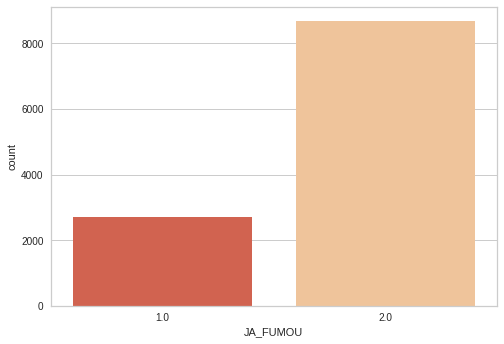

In [148]:
ax = sns.countplot(x=y,palette='OrRd_r')

In [149]:
nr= NearMiss()
X,y = nr.fit_resample(X,y)

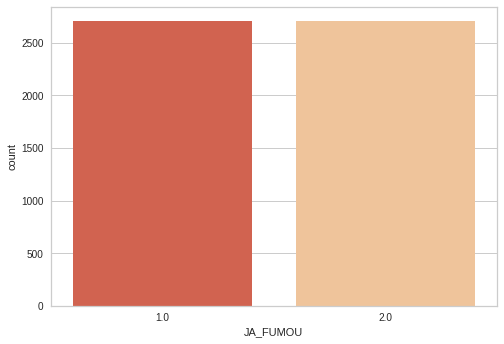

In [150]:
ax = sns.countplot(x=y,palette='OrRd_r')

4.7 - Separação em base de treinamento e base de teste 

In [151]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.15, random_state = 0)
X_treinamento.shape, y_treinamento.shape, X_teste.shape, y_teste.shape, X.shape, y.shape

((4600, 42), (4600,), (812, 42), (812,), (5412, 42), (5412,))

-------------------------------------------------------------

5.0 - TUNING - Identificação dos melhores parâmetros para utilização dos algoritimos de machine learn

5.1 - Concatenando a base de treinamento e base de teste 

In [152]:
X_df = np.concatenate((X_treinamento, X_teste), axis = 0)
X_df.shape

(5412, 42)

In [153]:
Y_df = np.concatenate((y_treinamento, y_teste), axis = 0)
Y_df.shape

(5412,)

5.2 - identificação dos parâmentros de Randon Forest

In [154]:
paramentros_RF = {'criterion':['gini','entropy'],
                      'n_estimators':[10,40,100,150],
                      'min_samples_split':[2,5,10],
                      'min_samples_leaf':[1,5,10]}

In [155]:
gridRN = GridSearchCV(estimator = RandomForestClassifier(),param_grid=paramentros_RF)
gridRN.fit(X_df,Y_df)
melhoresParametros = gridRN.best_params_
melhorResultado = gridRN.best_score_
print(melhoresParametros)
print(melhorResultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.8776777043298976


5.3  - identificação dos parâmentros de árvore de decisão

In [156]:
paramentros_DT = {'criterion':['gini','entropy'],
                      'splitter':['best','random'],
                      'min_samples_split':[2,5,10],
                      'min_samples_leaf':[1,5,10]}

In [157]:
gridDT = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=paramentros_DT)
gridDT.fit(X_df,Y_df)
melhoresParametros = gridDT.best_params_
melhorResultado = gridDT.best_score_
print(melhoresParametros)
print(melhorResultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}
0.8664070673814608


5.4 - identificação dos parâmentros de Redes Neurais

In [158]:
paramentros_RN = {'activation': ['relu','logistic','tahn'],
                  'solver': ['adam','sgd'],
                  'batch_size':[10,50]}

In [ ]:
gridRN= GridSearchCV(estimator = MLPClassifier(),param_grid=paramentros_RN)
gridRN.fit(X_df, Y_df)
melhoresParametros = gridRN.best_params_
melhorResultado = gridRN.best_score_

In [160]:
print(melhoresParametros)
print(melhorResultado)

{'activation': 'logistic', 'batch_size': 50, 'solver': 'adam'}
0.8822975816816093


-------------------------------------------------------------

6.0 - IMPLEMENTAÇÃO DOS MODELOS DE MACHINE LEARN 

6.1 - Random Forest

In [161]:
random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 100)
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5)

In [162]:
previsoes_RF = random_forest.predict(X_teste)
previsoes_RF

array([2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 1.,
       1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2.,
       2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
       1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2.,
       2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 1.

In [163]:
accuracy_score(y_teste, previsoes_RF)

0.8866995073891626

In [164]:
print(classification_report(y_teste, previsoes_RF))

              precision    recall  f1-score   support

         1.0       0.89      0.87      0.88       396
         2.0       0.88      0.90      0.89       416

    accuracy                           0.89       812
   macro avg       0.89      0.89      0.89       812
weighted avg       0.89      0.89      0.89       812



6.1.1 - Matriz de confusão Random Forest

0.8866995073891626

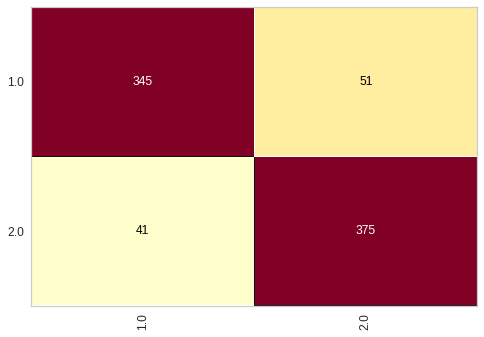

In [165]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

6.2 - Árvore de decisão

In [166]:
arvore_decisao = tree.DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 10, min_samples_split= 5, splitter= 'best')

In [167]:
arvore_decisao.fit(X, y)
arvore_decisao.score(X, y)

0.889320029563932

In [168]:
previsao_Tree = arvore_decisao.predict(X_teste)
previsao_Tree

array([2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1.,
       1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
       1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2.,
       2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 1.

In [169]:
accuracy_score(y_teste, previsao_Tree)

0.8805418719211823

In [170]:
print(classification_report(y_teste, previsao_Tree))

              precision    recall  f1-score   support

         1.0       0.88      0.87      0.88       396
         2.0       0.88      0.89      0.88       416

    accuracy                           0.88       812
   macro avg       0.88      0.88      0.88       812
weighted avg       0.88      0.88      0.88       812



6.2.1 - Matriz de confusão Árvore de decisão

0.8805418719211823

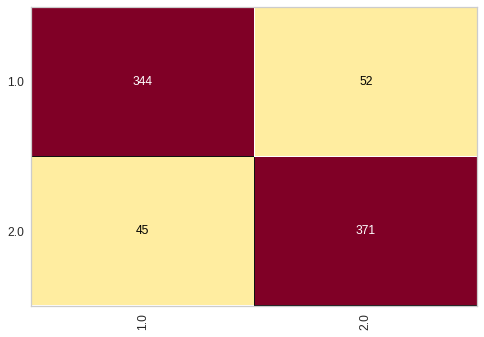

In [171]:
cm = ConfusionMatrix(arvore_decisao)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

6.3 - Redes Neurais

In [172]:
rede_neural = MLPClassifier(activation= 'logistic', batch_size= 50, solver= 'adam')
rede_neural.fit(X_treinamento, y_treinamento)

MLPClassifier(activation='logistic', batch_size=50)

In [173]:
previsoes_RN = rede_neural.predict(X_teste)
previsoes_RN

array([2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1.,
       1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1.,
       2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 2.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2.,
       2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 1.

In [174]:
accuracy_score(y_teste, previsoes_RN)

0.8805418719211823

In [175]:
print(classification_report(y_teste, previsoes_RN))

              precision    recall  f1-score   support

         1.0       0.90      0.85      0.87       396
         2.0       0.87      0.91      0.89       416

    accuracy                           0.88       812
   macro avg       0.88      0.88      0.88       812
weighted avg       0.88      0.88      0.88       812



6.3.1 - Matriz de confusão Redes Neurais 

0.8805418719211823

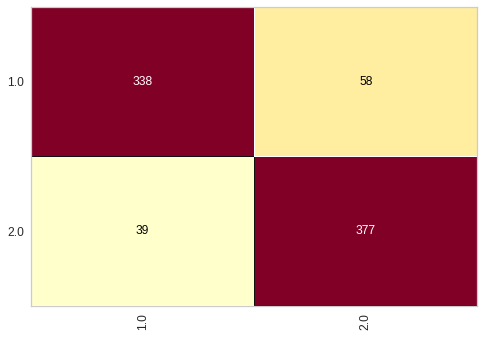

In [176]:
cm = ConfusionMatrix(rede_neural)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

----------------------------------------------------------------


7.0 - VALIDAÇÃO CRUZADA ( CROSS VALIDATION)

7.1 - Validação cruzada para Randon Forest

In [177]:
resultadosVC_RF =[]

for i in range(30):
  kfold = KFold(n_splits=10 , shuffle=True, random_state=i)
  RF = RandomForestClassifier(criterion='entropy', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 100)
  scores = cross_val_score(RF,X_df, Y_df, cv= kfold )
  resultadosVC_RF.append(scores.mean())
resultadosVC_RF

[0.8721361289398477,
 0.8756488258043392,
 0.8730610254346537,
 0.8730562508952261,
 0.8747242703480639,
 0.8739791011588489,
 0.8739848988138681,
 0.8732414348173057,
 0.873609415391751,
 0.8741745162368446,
 0.8728765235896352,
 0.8706601141797,
 0.8743521973112521,
 0.8739750086964826,
 0.872134423747195,
 0.8728748183969826,
 0.8728710669731466,
 0.8730603433575925,
 0.8741697416974169,
 0.8702877001043576,
 0.87564916684287,
 0.8712098682909195,
 0.8715778488653647,
 0.8734290060090988,
 0.8710345744862253,
 0.876016465340254,
 0.8714018729836097,
 0.8728748183969823,
 0.8734266187393851,
 0.8726872472051893]

7.2 - Validação cruzada para árvore de decisão

In [178]:
resultadosVC_arvore =[]

for i in range(30):
  kfold = KFold(n_splits=10 , shuffle=True, random_state=i)
  DT = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 10, min_samples_split= 5, splitter= 'best')
  scores = cross_val_score(DT,X_df, Y_df, cv= kfold )
  resultadosVC_arvore.append(scores.mean())
resultadosVC_arvore

[0.862529073534728,
 0.8621627981529352,
 0.8641895901398939,
 0.8584628711351808,
 0.8612341502342934,
 0.8632646936450881,
 0.8610506715048667,
 0.8595685180511694,
 0.861784586422574,
 0.8610527177360499,
 0.8617910661546541,
 0.8595705642823527,
 0.8623415023429347,
 0.8608562795424627,
 0.8630818969927223,
 0.8619748859226115,
 0.8588305106710956,
 0.8566147833382216,
 0.8608637823901345,
 0.863079850761539,
 0.8571751096438875,
 0.8580928443295524,
 0.8592005374767242,
 0.8614189931178424,
 0.8590208101711332,
 0.8636336973351249,
 0.8629014876100701,
 0.8542135310447374,
 0.8641906132554856,
 0.8595692001282306]

7.3 - Validação cruzada para Redes Neurais 

In [ ]:
resultadosVC_RN =[]

for i in range(30):
  kfold = KFold(n_splits=10 , shuffle=True, random_state=i)
  RN = MLPClassifier(activation= 'logistic', batch_size= 50, solver= 'adam')
  scores = cross_val_score(RN,X_df, Y_df, cv= kfold )
  resultadosVC_RN.append(scores.mean())
resultadosVC_RN

In [180]:
resultadosVC_RN

[0.8819314376138216,
 0.8824839200332854,
 0.8808227213510582,
 0.8832161297583401,
 0.8813745216934608,
 0.8813707702696251,
 0.8813734985778694,
 0.8819266630743942,
 0.8834043830271943,
 0.8819345069605964,
 0.8810058590419546,
 0.8798961196635997,
 0.8837754329484145,
 0.8826633063003457,
 0.8819307555367606,
 0.8800819856627402,
 0.8826656935700596,
 0.881191042964034,
 0.8830404949151154,
 0.8815576593843572,
 0.8795298442818069,
 0.8815569773072962,
 0.8815559541917046,
 0.8813738396163998,
 0.8824897176883043,
 0.8826708091480177,
 0.8793446603597275,
 0.8832226094904202,
 0.8824818738021021,
 0.8821115059579432]

----------------------------------------------------------------

8.0 - ANÁLISE DOS RESULTADOS 

8.1 - Salvando em fomarto csv os dados adquiridos através da análise de cross validation

In [181]:
resultados = pd.DataFrame({'Random_Forest':resultadosVC_RF, 'Arvore':resultadosVC_arvore, 'Rede_Neural':resultadosVC_RN})
resultados.to_csv('/content/resultados_cross_validation.csv')
resultados.head(10)

,Random_Forest,Arvore,Rede_Neural
0,0.872136,0.862529,0.881931
1,0.875649,0.862163,0.882484
2,0.873061,0.864190,0.880823
3,0.873056,0.858463,0.883216
4,0.874724,0.861234,0.881375
5,0.873979,0.863265,0.881371
6,0.873985,0.861051,0.881373
7,0.873241,0.859569,0.881927
8,0.873609,0.861785,0.883404
9,0.874175,0.861053,0.881935


8.2 - Análise das médias, desvios padrões, valores máximos e mínimos de acurácia  após utilização de cross validation


In [182]:
resultados.describe()

,Random_Forest,Arvore,Rede_Neural
count,30.000000,30.000000,30.000000
mean,0.873140,0.860791,0.881799
std,0.001437,0.002379,0.001122
min,0.870288,0.854214,0.879345
25%,0.872274,0.859293,0.881371
50%,0.873061,0.861143,0.881929
75%,0.873983,0.862482,0.882620
max,0.876016,0.864191,0.883775


8.3 - Coeficinete de variação (probabilidade) 

In [183]:
(resultados.std()/resultados.mean())*100

Random_Forest    0.164623
Arvore           0.276385
Rede_Neural      0.127214
dtype: float64